<a href="https://colab.research.google.com/github/kingsuching/lab-1-phase-2-kingsuching/blob/main/DATA_301_Lab_1A_Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Distribution of First Digits

In this lab, you will explore the distribution of first digits in real data. For example, the first digits of the numbers 52, 30.8, and 0.07 are 5, 3, and 7 respectively. In this lab, you will investigate the question: how frequently does each digit 1-9 appear as the first digit of the number?

## Question 0

Make a prediction. 

1. Approximately what percentage of the values do you think will have a _first_ digit of 1? What percentage of the values do you think will have a first digit of 9?
2. Approximately what percentage of the values do you think will have a _last_ digit of 1? What percentage of the values do you think will have a last digit of 9?

(Don't worry about being wrong. You will earn full credit for any justified answer.)

**WRITTEN EXPLANATION:**


There are only 9 possible digits for the first digit since 0 will never be showing as the first digit as it is redundant. Thus, the first digit could only be 1-9. The expected proportion of each digit is 1/9 = 1 (for both 1 or 9 in the first digit position)


For the final digit spot 0 becomes a possibility. Therefore there are 10 possible digits for the last digit spot. Thus, the last digit could be 0-9. The expected proportion of each digit is 1/10 = 10% (for both 1 or 9 in the last digit position)

## Question 1

The [S&P 500](https://en.wikipedia.org/wiki/S%26P_500_Index) is a stock index based on the market capitalizations of large companies that are publicly traded on the NYSE or NASDAQ. The CSV file (https://dlsun.github.io/pods/data/sp500.csv) contains data from February 1, 2018 about the stocks that comprise the S&P 500. We will investigate the first digit distributions of the variables in this data set.

Read in the S&P 500 data. What is the unit of observation in this data set? Is there a variable that is natural to use as the index? If so, set that variable to be the index. Once you are done, display the `DataFrame`.

In [ ]:
# ENTER YOUR CODE HERE.
import pandas as pd
df_sp = pd.read_csv('https://dlsun.github.io/pods/data/sp500.csv')
df_sp.Name.describe()

df_sp.set_index('Name')

,date,open,close,volume
Name,,,,
AAL,2018-02-01,$54.00,$53.88,3623078
AAPL,2018-02-01,$167.16,$167.78,47230787
AAP,2018-02-01,$116.24,$117.29,760629
ABBV,2018-02-01,$112.24,$116.34,9943452
ABC,2018-02-01,$97.74,$99.29,2786798
...,...,...,...,...
XYL,2018-02-01,$72.50,$74.84,1817612
YUM,2018-02-01,$84.24,$83.98,1685275
ZBH,2018-02-01,$126.35,$128.19,1756300


**WRITTEN EXPLANATION:**

The unit of observation in this dataset is each company. I ensured that there are no repeats (each comapny name is unique) and therefore I made this attribute the index. 

## Question 2

We will start by looking at the `volume` column. This variable tells us how many shares were traded on that date.

Extract the first digit of every value in this column. (_Hint:_ First, turn the numbers into strings. Then, use the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` to extract the first character of each string.) Make an appropriate visualization to display the distribution of the first digits. (_Hint:_ Think carefully about whether the variable you are plotting is quantitative or categorical.)

How does this compare with what you predicted in Question 0?

1    0.326733
2    0.184158
3    0.116832
4    0.085149
5    0.081188
6    0.071287
7    0.049505
8    0.043564
9    0.041584
Name: volume 1st, dtype: float64

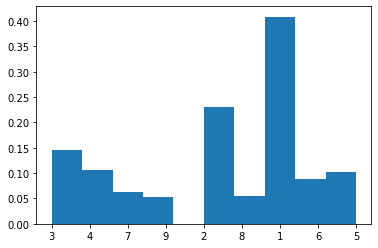

In [ ]:
import matplotlib.pyplot as plt
df_sp['volume']=df_sp['volume'].astype(str)
df_sp['volume 1st'] = df_sp['volume'].str[:1]
plot = plt.hist(df_sp['volume 1st'],density=True)
df_sp['volume 1st'].value_counts(normalize=True)

**WRITTEN EXPLANATION:**



The bases of our logic was correct in that a greater number of first digits are 1 than 9. We were surprised to see that the proportion of 1's in the first digit spot was as high as 33%.
Actual result:

1 ~ 33%

9 ~ 4%

## Question 3

Now, repeat Question 2, but for the distribution of _last_ digits. Again, make an appropriate visualization and compare with your prediction in Question 0.

8    0.110891
2    0.110891
9    0.104950
1    0.104950
0    0.102970
7    0.102970
6    0.100990
3    0.095050
5    0.087129
4    0.079208
Name: volume last, dtype: float64

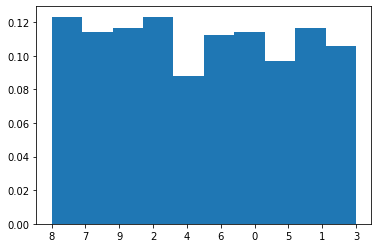

In [ ]:
df_sp['volume last'] = df_sp['volume'].str[-1]
plt.hist(df_sp['volume last'].sort_index(),density=True) 

df_sp['volume last'].value_counts(normalize=True)

**WRITTEN EXPLANATION:**

These results matched our prediction that there should be equal proportions of 1 and 9 in the last digits position. And similar to our prediction this proportion is around 10%. This is evident through the histogram which displays a more uniform distributioin than the previous example.
Actual results:

1 ~ 10.5%

9 ~ 10.5%

## Question 4

Maybe the `volume` column was just a fluke. Let's see if the first digit distribution holds up when we look at a very different variable: the closing price of the stock. Make a visualization of the first digit distribution of the closing price (the `close` column of the `DataFrame`). Comment on what you see.

(_Hint:_ What type did `pandas` infer this variable as and why? You will have to first clean the values using the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` and then convert this variable to a quantitative variable.)

1    0.338614
2    0.108911
3    0.102970
6    0.095050
4    0.085149
7    0.085149
5    0.077228
8    0.055446
9    0.051485
Name: close 1st, dtype: float64

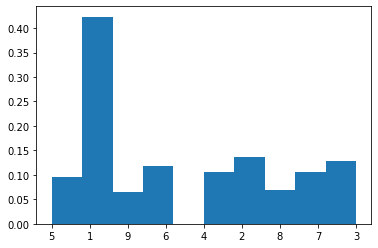

In [ ]:
df_sp['close']=df_sp['close'].astype(str)
df_sp['close 1st'] = df_sp['close'].str[1:2]
plt.hist(df_sp['close 1st'],density=True) 

df_sp['close 1st'].value_counts(normalize=True)

**WRITTEN EXPLANATION:**

Closing price seems to display similar behavior as the volume column since the proportion of 1's is at 33%. In fact, the closing price of the stocks tend to also have a large proportion of 1's just like the volume.

Actual results:

1 ~ 34%

9 ~ 5%